## INTERN NAME : Prishita Das
### TASK 3 : Exploratory Data Analysis - Retail
### LEVEL : Beginner

#### Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’     
#### As a business manager, try to find out the weak areas where you can work to make more profit.     
#### What all business problems you can derive by exploring the data?

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#Setting the float values to display at 2 decimal points
pd.set_option('display.float_format', lambda x:'%.2f'%x)

In [3]:
#Import the dataset
data = pd.read_csv("C://TSF task//SampleSuperstore.csv")

In [4]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.00,41.91
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.00,219.58
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.62,2,0.00,6.87
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.58,5,0.45,-383.03
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.37,2,0.20,2.52


## Data Preparation

In [5]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [6]:
#changing column names for convenience
data.columns = ['ship_mode', 'segment', 'country', 'city', 'state', 'postal_code',
       'region', 'category', 'sub_category', 'sales', 'quantity', 'discount',
       'profit']

In [7]:
data.shape

(9994, 13)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ship_mode     9994 non-null   object 
 1   segment       9994 non-null   object 
 2   country       9994 non-null   object 
 3   city          9994 non-null   object 
 4   state         9994 non-null   object 
 5   postal_code   9994 non-null   int64  
 6   region        9994 non-null   object 
 7   category      9994 non-null   object 
 8   sub_category  9994 non-null   object 
 9   sales         9994 non-null   float64
 10  quantity      9994 non-null   int64  
 11  discount      9994 non-null   float64
 12  profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


1) There are no missing values in the dataset.   
2) There are 8 categorical variables and 5 continuous variables.

In [9]:
#changing data type for both Postal Code and Quantity
data["postal_code"] = data["postal_code"].astype('object')
data["quantity"] = data["quantity"].astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ship_mode     9994 non-null   object 
 1   segment       9994 non-null   object 
 2   country       9994 non-null   object 
 3   city          9994 non-null   object 
 4   state         9994 non-null   object 
 5   postal_code   9994 non-null   object 
 6   region        9994 non-null   object 
 7   category      9994 non-null   object 
 8   sub_category  9994 non-null   object 
 9   sales         9994 non-null   float64
 10  quantity      9994 non-null   float64
 11  discount      9994 non-null   float64
 12  profit        9994 non-null   float64
dtypes: float64(4), object(9)
memory usage: 1015.1+ KB


In [10]:
#Checking for missing values
data.isnull().sum()

ship_mode       0
segment         0
country         0
city            0
state           0
postal_code     0
region          0
category        0
sub_category    0
sales           0
quantity        0
discount        0
profit          0
dtype: int64

In [11]:
#Checking for duplicates
data.duplicated().sum()

17

In [12]:
#Removing duplicates
data.drop_duplicates(subset=None, keep='first', inplace=True)

In [13]:
data.shape

(9977, 13)

In [14]:
#Checking for the number of unique values
data.nunique()

ship_mode          4
segment            3
country            1
city             531
state             49
postal_code      631
region             4
category           3
sub_category      17
sales           5825
quantity          14
discount          12
profit          7287
dtype: int64

In [15]:
print(data["country"].unique())

['United States']


In [16]:
#Since we see that the country column of the dataset has only one entry ,i.e United States, hence we drop the country column 
data=data.drop('country',axis=1)
data.head(1)

,ship_mode,segment,city,state,postal_code,region,category,sub_category,sales,quantity,discount,profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2.00,0.00,41.91


## Univariate Analysis of Categorical Variables

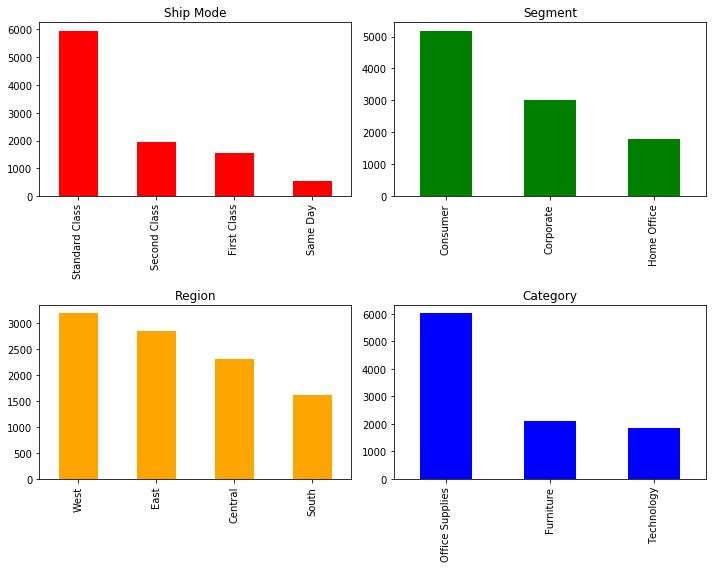

In [17]:
#Checking the frequency of the categorical variables
f1, axes = plt.subplots(2,2,figsize=(10,8))
shipm=(data["ship_mode"].value_counts()).plot.bar(ax=axes[0,0],y="count",color="r")
seg=(data["segment"].value_counts()).plot.bar(ax=axes[0,1],y="count",color="g")
reg=(data["region"].value_counts()).plot.bar(ax=axes[1,0],y="count",color="orange")
cat=(data["category"].value_counts()).plot.bar(ax=axes[1,1],y="count",color="blue")
axes[0][0].set_title('Ship Mode')
axes[0][1].set_title('Segment')
axes[1][0].set_title('Region')
axes[1][1].set_title('Category')
plt.tight_layout()

1) Standard class have the highest frequency in shipmode.   
2) Consumer have the highest frequency in segment.    
3) West region has the highest frequency in region.    
4) Among all the categories Office supplies has the highest frequency.

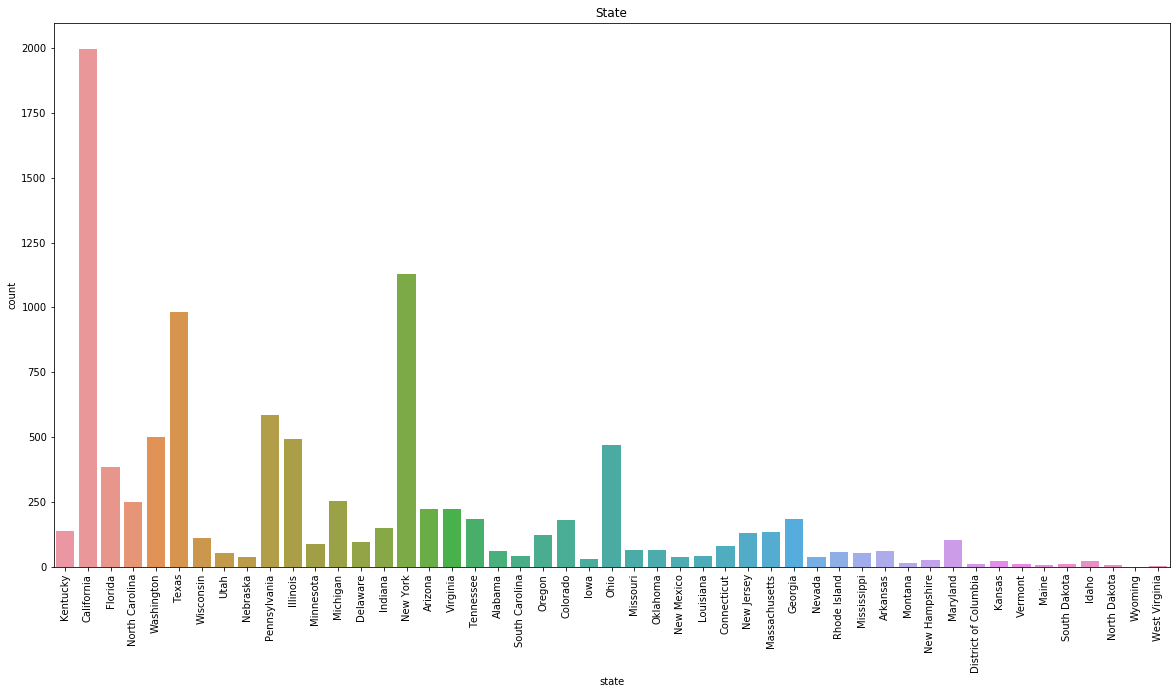

In [18]:
plt.figure(figsize=(20,10))
stateplot = sns.countplot(data["state"])
plt.xticks(rotation=90)
plt.title('State')
plt.show()

 Among the States California has the highest frequency followed by New York and Wyoming has the lowest frequency.

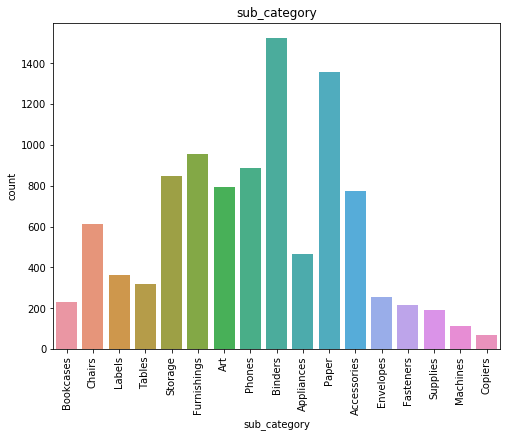

In [19]:
plt.figure(figsize=(8,6))
sub_cat = sns.countplot(data["sub_category"])
plt.xticks(rotation=90)
plt.title('sub_category')
plt.show()

Among the Sub-Category we see that Binders have the highest frequency and copiers have the lowest.

## Univariate analysis of Continuous Variables

In [20]:
data.describe()

,sales,quantity,discount,profit
count,9977.00,9977.00,9977.00,9977.00
mean,230.15,3.79,0.16,28.69
std,623.72,2.23,0.21,234.46
min,0.44,1.00,0.00,-6599.98
25%,17.30,2.00,0.00,1.73
50%,54.82,3.00,0.20,8.67
75%,209.97,5.00,0.20,29.37
max,22638.48,14.00,0.80,8399.98


In [21]:
#Lets check the entries with maximum sales and profit
max_sales = data[data["sales"]>22638]
max_sales.head()

,ship_mode,segment,city,state,postal_code,region,category,sub_category,sales,quantity,discount,profit
2697,Standard Class,Home Office,Jacksonville,Florida,32216,South,Technology,Machines,22638.48,6.00,0.50,-1811.08


In [22]:
max_profit = data[data["profit"]>8399]
max_profit.head()

,ship_mode,segment,city,state,postal_code,region,category,sub_category,sales,quantity,discount,profit
6826,Standard Class,Corporate,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.95,5.00,0.00,8399.98


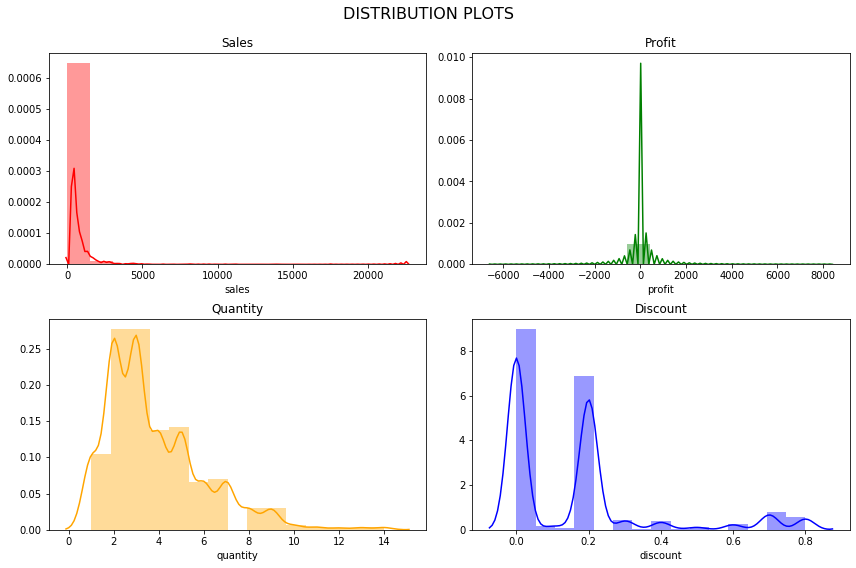

In [23]:
#Lets check the distribution of the continuous variables
f2, axes = plt.subplots(2,2,figsize=(12,8))
f2.suptitle("DISTRIBUTION PLOTS",fontsize=16)
sales_dist=sns.distplot(data.sales, bins=15,ax=axes[0,0],color="red")
profit_dist=sns.distplot(data.profit, bins=15,ax=axes[0,1],color="green")
quantity_dist=sns.distplot(data.quantity, bins=15,ax=axes[1,0],color="orange")
discount_dist = sns.distplot(data.discount,bins=15,ax=axes[1,1],color="blue")
axes[0,0].set_title("Sales")
axes[0,1].set_title("Profit")
axes[1,0].set_title("Quantity")
axes[1,1].set_title("Discount")
plt.tight_layout()
f2.subplots_adjust(top=0.9)

In [90]:
#Overall Profit Summary
summary = pd.DataFrame({'Profit':data.quantity[data.profit > 0 ].sum(), 
                        'No-Profit':data.quantity[data.profit == 0].sum(), 
                        'Loss':data.quantity[(data.profit) < 0].sum()},index={'Count'}).T

summary.head()

,Count
Profit,30530.00
No-Profit,255.00
Loss,7035.00


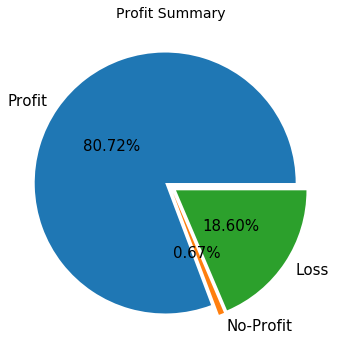

In [91]:
pie, ax = plt.subplots(figsize=[10,6])
labels = ["Profit","No-Profit","Loss"]
plt.pie(x=summary, autopct="%1.2f%%",explode=[0.05]*3, labels=labels, pctdistance=0.5,textprops = {"fontsize":15})
plt.title("Profit Summary", fontsize=14)
plt.show()

## Bivariate Analysis

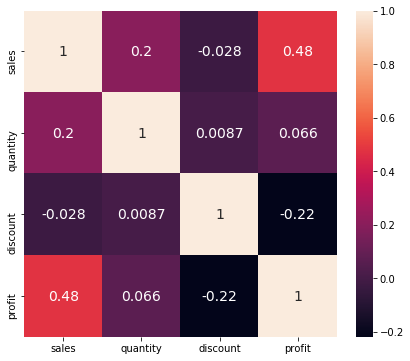

In [26]:
cor1 = data.corr()
plt.figure(figsize=(7,6))
sns.heatmap(cor1, annot=True, cbar=True, annot_kws={'size':14})
plt.show()

1) Profit and Discount are negatively correlated implying more discount leads in lesser profit.   
2) Profit and Sales has a good amount of positive correlation indicating more sales leads to higher profit.

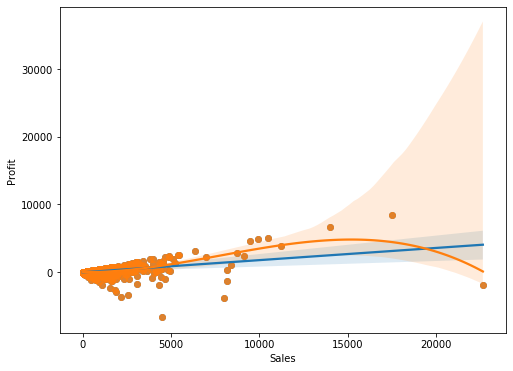

In [27]:
#Lets plot a scatter diagram for Sales and Profit
plt.figure(figsize=(8,6))
scat1 = sns.regplot(data=data,x="sales", y="profit",scatter=True)
scat1 = sns.regplot(data=data,x="sales", y="profit",scatter=True,order=3)#To see a better fitted line
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()

The data is overfitted when we take order=3.    
We see that in general as sales increases profit increases as well. However there are outliers.

In [28]:
#Lets filter the outlier
outlier = data[data["sales"] > 20000]
outlier.head()

,ship_mode,segment,city,state,postal_code,region,category,sub_category,sales,quantity,discount,profit
2697,Standard Class,Home Office,Jacksonville,Florida,32216,South,Technology,Machines,22638.48,6.00,0.50,-1811.08


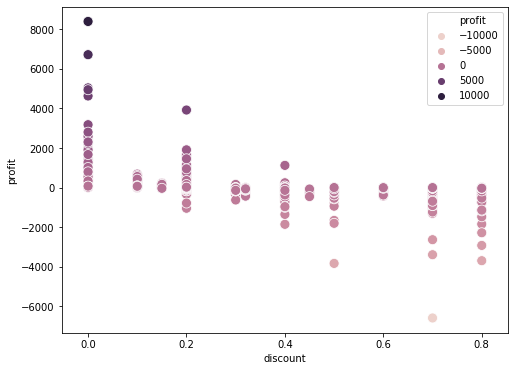

In [29]:
#Lets see the relationship between Discount and Profit
plt.figure(figsize=(8,6))
scat2 = sns.scatterplot(data=data,x="discount", y="profit",hue="profit", s=100)

We can see that the profit decreases as discount increases.

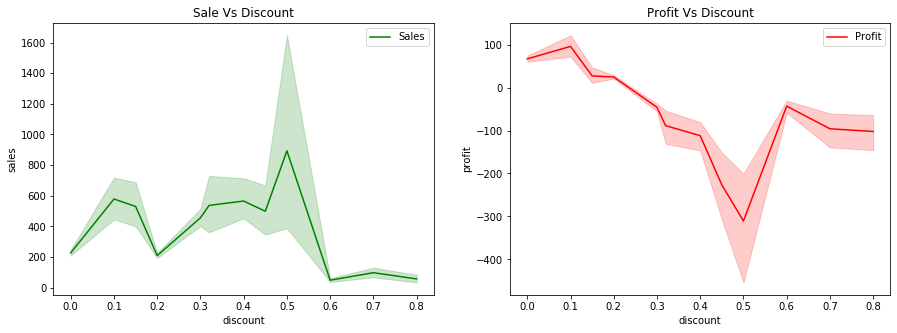

In [30]:
#Lets check the Sales and Profit VS Discount for the data
f3, ax = plt.subplots(1,2, figsize=(15,5))
ds=sns.lineplot(data=data,x="discount",y="sales", color='green', label='Sales', ax=ax[0])
dp=sns.lineplot(data=data,x="discount",y="profit", color='red', label='Profit', ax=ax[1])
ax[0].set_title("Sale Vs Discount")
ax[1].set_title("Profit Vs Discount")
plt.show()

1) We see that sales is maximum when discount is 0.5, however profit is the lowest at this point.   
2) Profit is maximum when there is no discount.

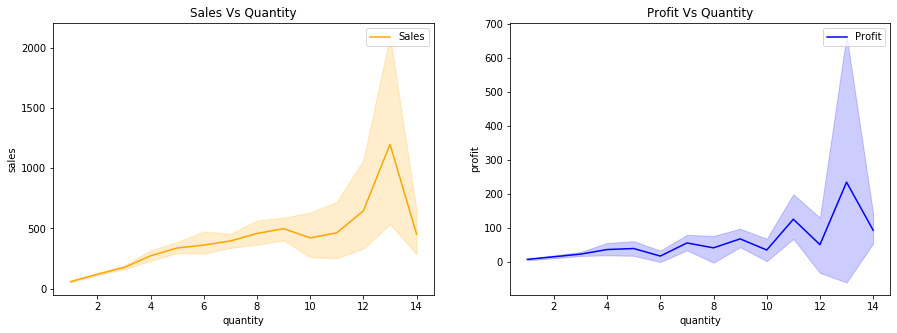

In [33]:
#Lets check the Profit VS Discount and Quantity
f4, ax = plt.subplots(1,2, figsize=(15,5))
qs=sns.lineplot(data=data,x="quantity",y="sales", color='orange', label='Sales', ax=ax[0])
qp=sns.lineplot(data=data,x="quantity",y="profit", color='blue', label='Profit', ax=ax[1])
ax[0].set_title("Sales Vs Quantity")
ax[1].set_title("Profit Vs Quantity")
plt.show()

1) From a general perspective we see that sales increases as the quantity increases.    
2) We see a trend that profit is higher when the quantity sold is odd an number.

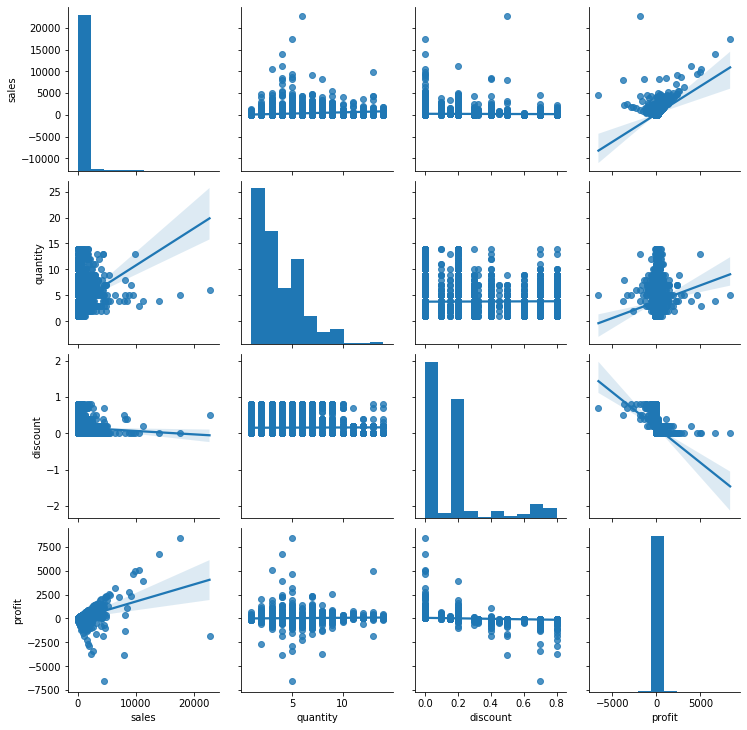

In [34]:
#Lets plot a pairplot to summarise the relationship of all the continuous variables
sns.pairplot(data=data.iloc[:,-4:], kind='reg')
plt.show()

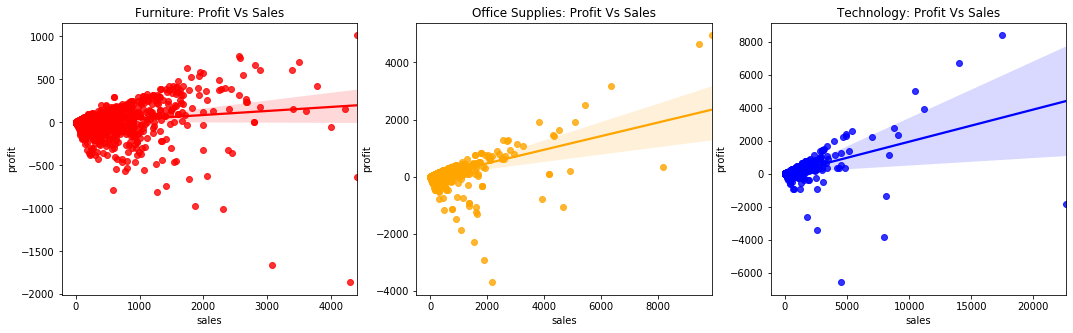

In [35]:
#Lets see the relationship between profit and sales across each category.
furni = data[data["category"]=="Furniture"]
office_s = data[data["category"]=="Office Supplies"]
tech = data[data["category"]=="Technology"]
f5,axes = plt.subplots(1,3,figsize=(18,5))
ps_furni= sns.regplot(data=furni,y="profit",x="sales",color="red", ax = axes[0])
ps_office= sns.regplot(data=office_s,y="profit",x="sales",color="orange", ax = axes[1])
ps_tech= sns.regplot(data=tech,y="profit",x="sales",color="blue", ax = axes[2])
axes[0].set_title("Furniture: Profit Vs Sales")
axes[1].set_title("Office Supplies: Profit Vs Sales")
axes[2].set_title("Technology: Profit Vs Sales")
plt.show()

In [36]:
#Lets check the numerical values for better analysis
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
corr1 = pearsonr(furni["sales"], furni["profit"])
corr2 = pearsonr(office_s["sales"], office_s["profit"])
corr3 = pearsonr(tech["sales"], tech["profit"])
print(f'Correlation coefficient between sales and profit for Furniture category: {np.round(corr1[0],decimals=2)}')
print(f'Correlation coefficient between sales and profit for Office Supplies category: {np.round(corr2[0],decimals=2)}')
print(f'Correlation coefficient between sales and profit for Technology category: {np.round(corr3[0],decimals=2)}')

Correlation coefficient between sales and profit for Furniture category: 0.17
Correlation coefficient between sales and profit for Office Supplies category: 0.55
Correlation coefficient between sales and profit for Technology category: 0.51


For Office Supplies and Technology the correlation between sales and profit is positive and is higher than 0.5 indicating a good amount of correlation, i.e. as sales increases profit increases at a good rate.      
However, for Furniture category the correlation coefficient is positive, but it is less than 0.5, i.e. as sales increases profit increases but at a poor rate.

### Sales Analysis

In [37]:
#Lets check the sales analyis across Ship Mode, Segment, Region and Category respectively
ship_ts = data.groupby(["ship_mode"]).sum().sort_values("sales", ascending=False)
ship_ts = ship_ts[["sales"]]
ship_ts.reset_index(inplace=True) 
ship_ts.head()

,ship_mode,sales
0,Standard Class,1357316.35
1,Second Class,459177.05
2,First Class,351380.47
3,Same Day,128321.73


In [38]:
seg_ts = data.groupby(["segment"]).sum().sort_values("sales",ascending=False)
seg_ts = seg_ts[["sales"]]
seg_ts.reset_index(inplace=True)
seg_ts.head()

,segment,sales
0,Consumer,1160832.77
1,Corporate,706070.13
2,Home Office,429292.68


In [39]:
reg_ts = data.groupby(["region"]).sum().sort_values("sales",ascending = False)
reg_ts = reg_ts[["sales"]]
reg_ts.reset_index(inplace=True)
reg_ts.head()

,region,sales
0,West,725255.64
1,East,678435.20
2,Central,500782.85
3,South,391721.91


In [40]:
cat_ts = data.groupby(["category"]).sum().sort_values("sales",ascending = False)
cat_ts = cat_ts[["sales"]]
cat_ts.reset_index(inplace=True)
cat_ts.head()

,category,sales
0,Technology,836154.03
1,Furniture,741306.31
2,Office Supplies,718735.24


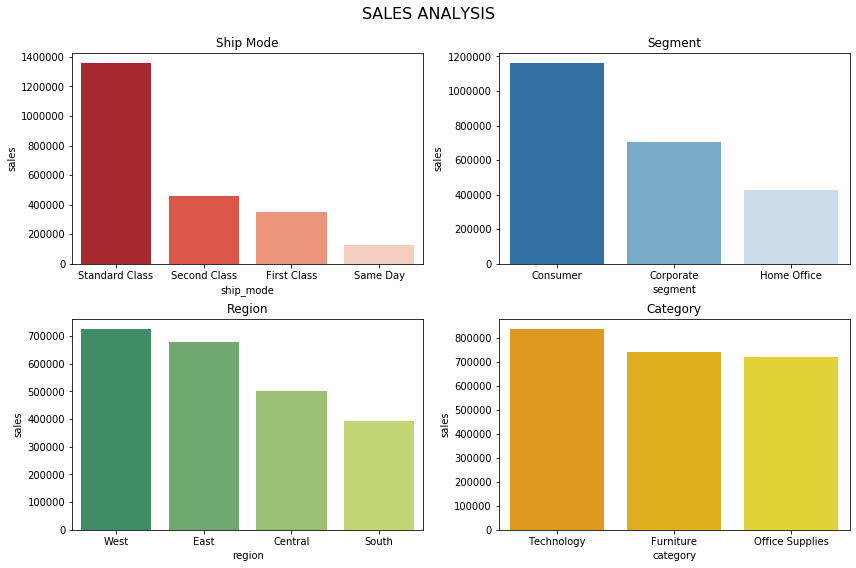

In [41]:
#Sales Analysis
f6, axes = plt.subplots(2,2,figsize=(12,8))
f6.suptitle("SALES ANALYSIS", fontsize=16)
s1=sns.barplot(data=ship_ts,x="ship_mode", y="sales",palette="Reds_r",ax=axes[0,0])
s2=sns.barplot(data=seg_ts,x="segment", y="sales",palette="Blues_r",ax=axes[0,1])
s3=sns.barplot(data=reg_ts,x="region", y="sales",palette="summer",ax=axes[1,0])
s4=sns.barplot(data=cat_ts,x="category", y="sales",palette="Wistia_r",ax=axes[1,1])
axes[0][0].set_title('Ship Mode')
axes[0][1].set_title('Segment')
axes[1][0].set_title('Region')
axes[1][1].set_title('Category')
plt.tight_layout()
f6.subplots_adjust(top=0.9)

For Shipmode : Standard Class has the highest total sales by a considerable margin .   
For Segment : Consumers contribute for highest total sales.    
For Region : The West region has the maximum total sales.     
For Category : Technology is responsible for the maximum total sales. However, the total sales of the other two categories are almost as high as technology.

### Profit Analysis

In [42]:
#Lets check the Profit analyis across Ship Mode, Segment, Region and Category respectively
ship_p = data.groupby(["ship_mode"]).sum().sort_values("profit", ascending=False)
ship_p = ship_p[["profit"]]
ship_p.reset_index(inplace=True) 
ship_p.head()

,ship_mode,profit
0,Standard Class,163969.23
1,Second Class,57446.65
2,First Class,48953.66
3,Same Day,15871.89


In [43]:
seg_p = data.groupby(["segment"]).sum().sort_values("profit",ascending=False)
seg_p = seg_p[["profit"]]
seg_p.reset_index(inplace=True)
seg_p.head()

,segment,profit
0,Consumer,134007.44
1,Corporate,91954.98
2,Home Office,60279.00


In [44]:
reg_p = data.groupby(["region"]).sum().sort_values("profit",ascending = False)
reg_p = reg_p[["profit"]]
reg_p.reset_index(inplace=True)
reg_p.head()

,region,profit
0,West,108329.81
1,East,91506.31
2,South,46749.43
3,Central,39655.88


In [45]:
cat_p = data.groupby(["category"]).sum().sort_values("profit",ascending = False)
cat_p = cat_p[["profit"]]
cat_p.reset_index(inplace=True)
cat_p.head()

,category,profit
0,Technology,145454.95
1,Office Supplies,122364.66
2,Furniture,18421.81


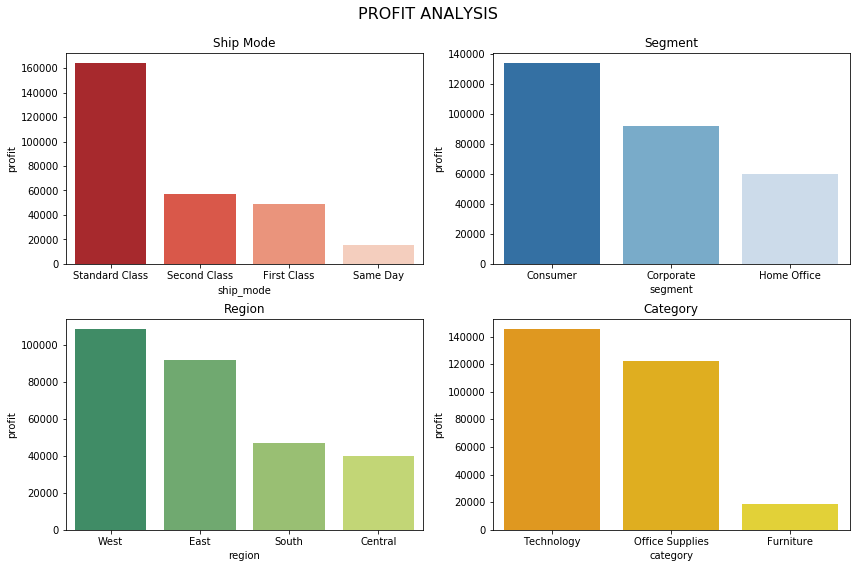

In [46]:
#Profit Analysis
f7, axes = plt.subplots(2,2,figsize=(12,8))
f7.suptitle("PROFIT ANALYSIS",fontsize=16)
p1=sns.barplot(data=ship_p,x="ship_mode", y="profit",palette="Reds_r",ax=axes[0,0])
p2=sns.barplot(data=seg_p,x="segment", y="profit",palette="Blues_r",ax=axes[0,1])
p3=sns.barplot(data=reg_p,x="region", y="profit",palette="summer",ax=axes[1,0])
p4=sns.barplot(data=cat_p,x="category", y="profit",palette="Wistia_r",ax=axes[1,1])
axes[0][0].set_title('Ship Mode')
axes[0][1].set_title('Segment')
axes[1][0].set_title('Region')
axes[1][1].set_title('Category')
plt.tight_layout()
f7.subplots_adjust(top=0.9)

For Shipmode : Standard Class has the highest total profit by a considerable margin whereas same day shipmode has the least total profit.     
For Segment : Consumers contribute to the highest total profit.        
For Region : Maximum total profit is achieved by the west region and the central region has the least total profit.         
For Category : Technology is responsible for the maximum total profit and the total profit for the furniture category is extremely low.

### Loss Analysis

In [47]:
#Lets check the Loss analyis across Ship Mode, Segment, Region and Category respectively
loss = np.round(data[(data.profit) < 0], decimals=2).sort_values('profit')

In [48]:
ship_l = loss.groupby("ship_mode").sum().sort_values("profit",ascending=True)
ship_l = ship_l[["profit"]]
ship_l.reset_index(inplace=True)
ship_l.head()

,ship_mode,profit
0,Standard Class,-100336.66
1,Second Class,-24218.25
2,First Class,-22660.31
3,Same Day,-8898.12


In [49]:
seg_l= loss.groupby("segment").sum().sort_values("profit",ascending=True)
seg_l= seg_l[["profit"]]
seg_l.reset_index(inplace=True)
seg_l.head()

,segment,profit
0,Consumer,-84945.97
1,Corporate,-44781.08
2,Home Office,-26386.29


In [50]:
reg_l= loss.groupby("region").sum().sort_values("profit",ascending=True)
reg_l= reg_l[["profit"]]
reg_l.reset_index(inplace=True)
reg_l.head()

,region,profit
0,Central,-56308.71
1,East,-49578.71
2,South,-27504.85
3,West,-22721.07


In [51]:
cat_l= loss.groupby("category").sum().sort_values("profit",ascending=True)
cat_l= cat_l[["profit"]]
cat_l.reset_index(inplace=True)
cat_l.head()

,category,profit
0,Furniture,-60924.24
1,Office Supplies,-56609.11
2,Technology,-38579.99


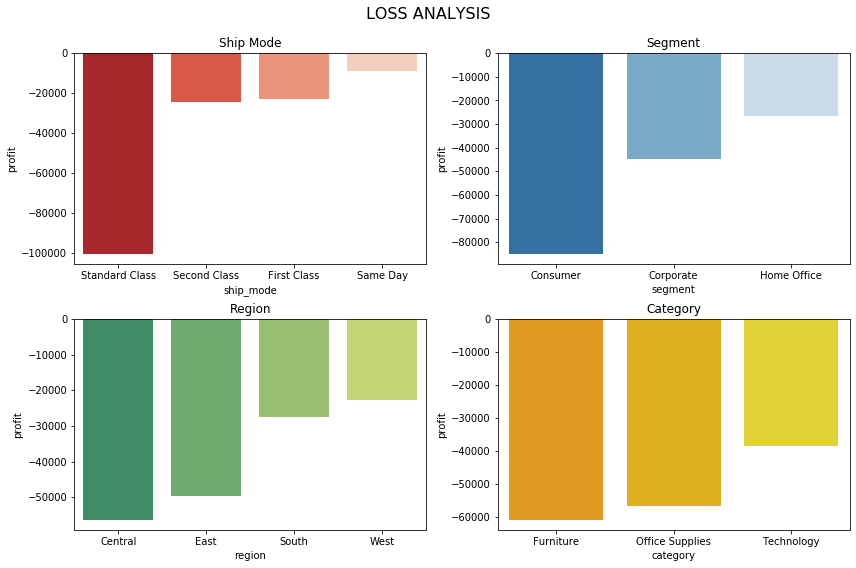

In [52]:
#Loss Analysis
f8, axes = plt.subplots(2,2,figsize=(12,8))
f8.suptitle("LOSS ANALYSIS", fontsize=16)
l1=sns.barplot(data=ship_l,x="ship_mode",y="profit",palette="Reds_r",ax=axes[0,0])
l2=sns.barplot(data=seg_l,x="segment", y="profit",palette="Blues_r",ax=axes[0,1])
l3=sns.barplot(data=reg_l,x="region", y="profit",palette="summer",ax=axes[1,0])
l4=sns.barplot(data=cat_l,x="category", y="profit",palette="Wistia_r",ax=axes[1,1])
axes[0][0].set_title('Ship Mode')
axes[0][1].set_title('Segment')
axes[1][0].set_title('Region')
axes[1][1].set_title('Category')
plt.tight_layout()
f8.subplots_adjust(top=0.9)

For Shipmode : Standard Class has the highest total loss by a considerable margin whereas same day shipmode has the least total loss.      
For Segment : Consumers are responsible for the maximum total loss.    
For Region : Central region is having the highest total loss.      
For Category : Furniture is responsible for the maximum total loss. 

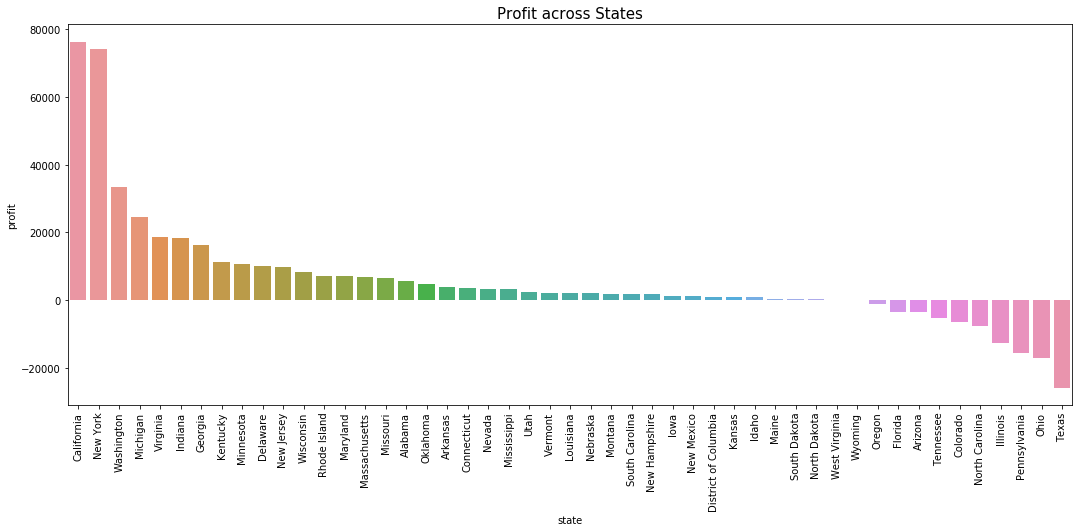

In [53]:
#Lets check the profit across each state
state_p = pd.DataFrame(data.groupby(["state"]).sum()).sort_values("profit",ascending=False)
state_p.reset_index(inplace=True)
plt.figure(figsize=(18,7))
plt.title("Profit across States",fontsize=15)
sns.barplot(x="state",y="profit",data=state_p)
plt.xticks(rotation=90)
plt.show()

California has the highest profit.     
Texas has the highest amount of loss.

In [54]:
#Lets summarise the profit in California
california_profit = data[data.state=="California"].profit.sum()
california_loss = data[data.state=="California"].profit.sum()-loss[loss.state=="California"].profit.sum()
print(f'Total profit in California : {np.round(california_profit,decimals=2)}')
print(f'Total profit in California excluding items that cause loss: {np.round(california_loss, decimals=2)}')

Total profit in California : 76330.79
Total profit in California excluding items that cause loss: 80100.53


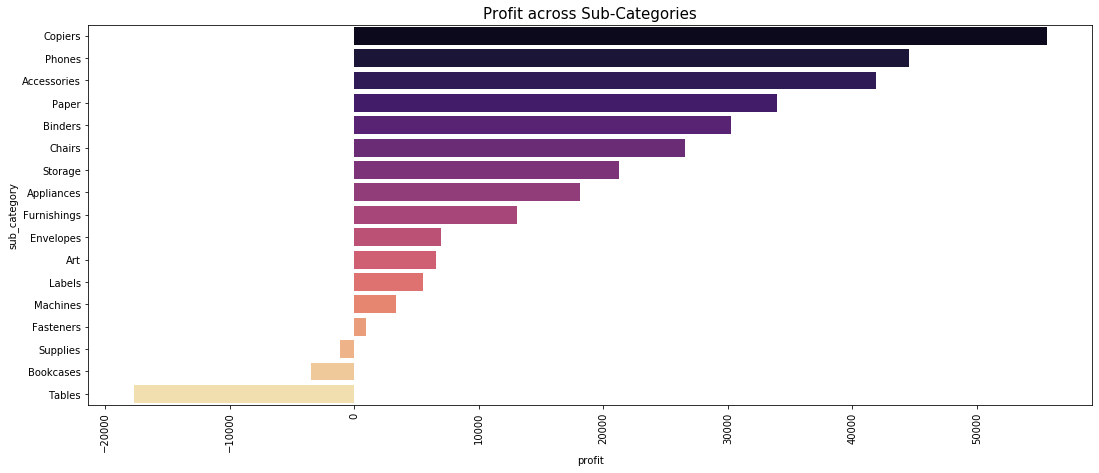

In [55]:
#Lets check the profit across each sub-category
state_sc = pd.DataFrame(data.groupby('sub_category').sum()).sort_values("profit",ascending=False)
state_sc.reset_index(inplace=True)
plt.figure(figsize=(18,7))
plt.title("Profit across Sub-Categories",fontsize=15)
sns.barplot(y="sub_category",x="profit",data=state_sc,palette="magma")
plt.xticks(rotation=90)
plt.show()

Copiers have the highest profit.    
Tables are great amoount of loss.

In [56]:
#Lets see which are the states with loss in each region
print(f'States with loss in each Region\n')#\n' is used for next line
print(f'Central\t:{loss[loss.region == "Central"].state.unique().tolist()}')#\t is used for space
print(f'South\t:{loss[loss.region == "South"].state.unique().tolist()}')
print(f'West\t:{loss[loss.region == "West"].state.unique().tolist()}')
print(f'East\t:{loss[loss.region == "East"].state.unique().tolist()}')


States with loss in each Region

Central	:['Texas', 'Illinois']
South	:['North Carolina', 'Florida', 'Tennessee']
West	:['Colorado', 'Arizona', 'Oregon', 'California', 'Nevada', 'Washington', 'New Mexico']
East	:['Ohio', 'Pennsylvania', 'New York', 'Massachusetts', 'Rhode Island', 'New Hampshire', 'West Virginia', 'Delaware', 'Maryland', 'New Jersey', 'Connecticut']


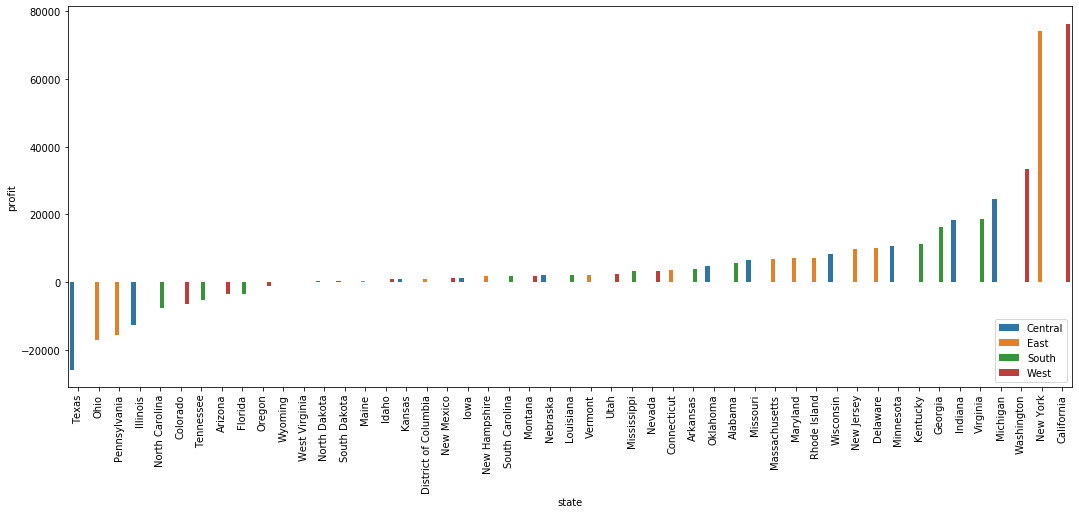

In [57]:
#Lets visualise the profit for each state across region
profit_reg = data.groupby(["region","state"]).sum().sort_values("profit",ascending=True)
profit_reg.reset_index(inplace=True)
plt.figure(figsize=(18,7))
sns.barplot(x="state",y="profit",hue="region",data=profit_reg)
plt.xticks(rotation=90)
plt.legend()
plt.show()

For Central Region : Texas has the maximum loss     
For East Region : Ohio has the maximum loss    
For South Region : Colorado has the maximum loss    
For West Region : North Carolina has the maximum loss     

For Central Region : Michigan has the maximum profit    
For East Region : New York has the maximum profit    
For South Region : Virginia has the maximum profit    
For West Region : California has the maximum profit

In [58]:
#Lets see which are the sub-categories with loss in each region
print(f'Sub-Categories with loss in each Category\n')#\n' is used for next line
print(f'Furniture\t:{loss[loss.category == "Furniture"].sub_category.unique().tolist()}')#\t is used for space
print(f'Office Supplies\t:{loss[loss.category == "Office Supplies"].sub_category.unique().tolist()}')
print(f'Technology\t:{loss[loss.category == "Technology"].sub_category.unique().tolist()}')

Sub-Categories with loss in each Category

Furniture	:['Tables', 'Bookcases', 'Chairs', 'Furnishings']
Office Supplies	:['Binders', 'Appliances', 'Supplies', 'Storage', 'Fasteners']
Technology	:['Machines', 'Phones', 'Accessories']


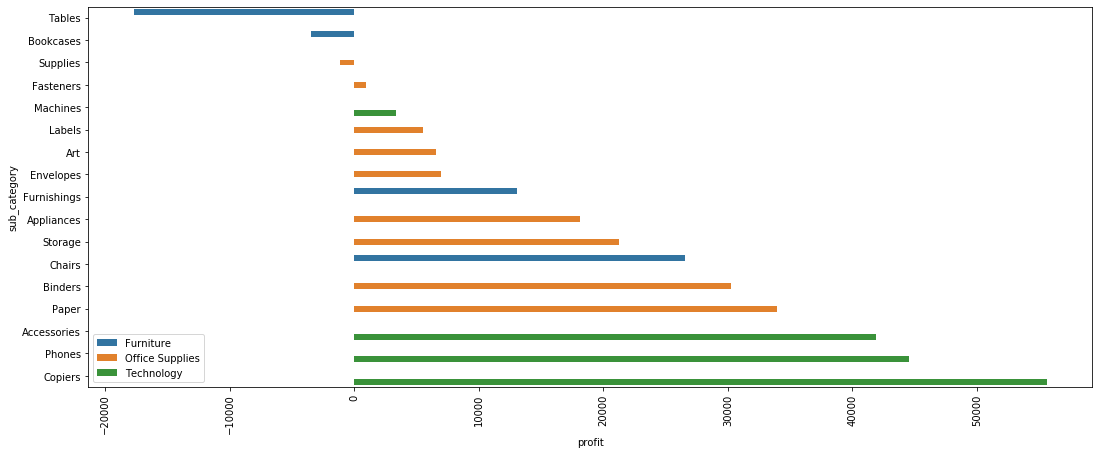

In [59]:
#Lets visualise the states with loss across region
profit_cat = data.groupby(["category","sub_category"]).sum().sort_values("profit",ascending=True)
profit_cat.reset_index(inplace=True)
plt.figure(figsize=(18,7))
sns.barplot(y="sub_category",x="profit",hue="category",data=profit_cat)
plt.xticks(rotation=90)
plt.legend()
plt.show()

For Furniture : Tables are at maximum loss.      
For Office Supplies : Supplies are at loss.    
For Technology : Machines are at profit but are responsible for the least profit in their category.

## Analysis of the states with maximum loss across the different regions

In [60]:
#Lets analyse the states with maximum loss across each region
central_l = loss[loss.state == 'Texas']
south_l = loss[loss.state == 'North Carolina']
west_l = loss[loss.state == 'Colorado']
east_l = loss[loss.state == 'Ohio']


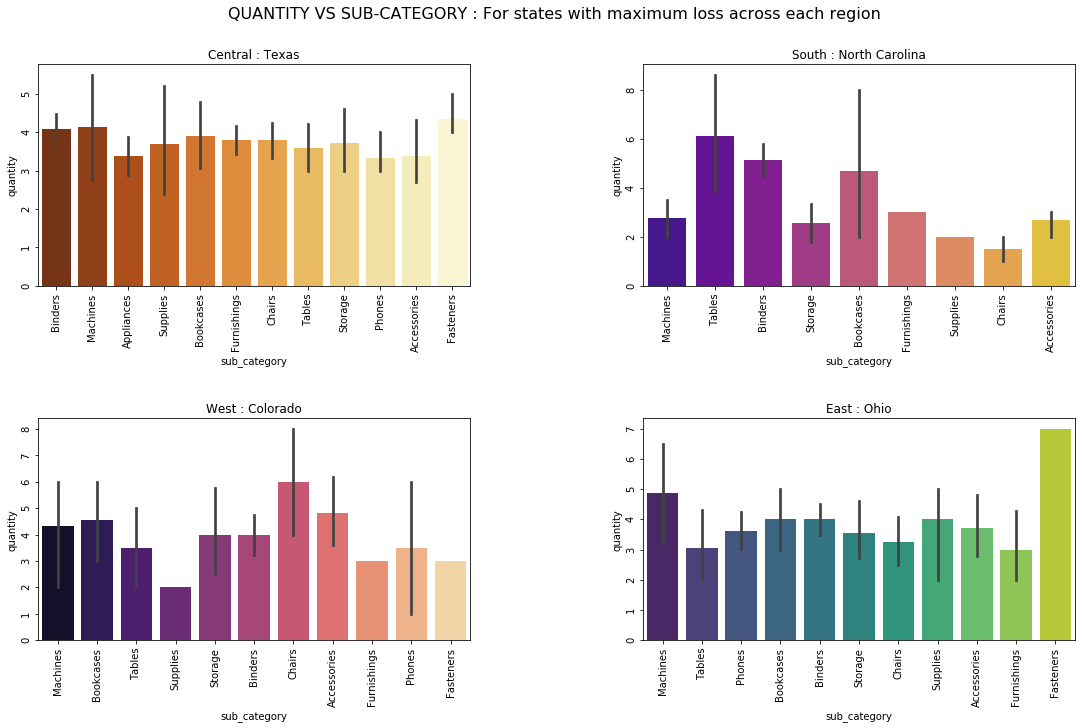

In [61]:
f9, axes = plt.subplots(2,2,figsize=(18,10))
f9.suptitle("QUANTITY VS SUB-CATEGORY : For states with maximum loss across each region ",fontsize=16)
cl = sns.barplot(data=central_l, x= "sub_category", y="quantity", ax = axes[0,0],palette="YlOrBr_r")
sl = sns.barplot(data=south_l, x= "sub_category", y="quantity", ax = axes[0,1], palette = "plasma")        
wl = sns.barplot(data=west_l, x= "sub_category", y="quantity", ax = axes[1,0], palette="magma")        
el = sns.barplot(data=east_l, x= "sub_category", y="quantity", ax = axes[1,1],palette="viridis")
axes[0][0].set_title('Central : Texas')
axes[0][1].set_title('South : North Carolina')
axes[1][0].set_title('West : Colorado')
axes[1][1].set_title('East : Ohio')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.6)
f9.subplots_adjust(top=0.9)

for ax in f9.axes:
    ax.tick_params(labelrotation=90)
    
plt.show()



### Profit Analysis for Texas (Region:Central)

In [62]:
#Lets check the profit acros each category for Texas
t = data[data["state"] == 'Texas']
t_cat1 = t[t.category == 'Furniture']
t_cat2 = t[t.category == 'Office Supplies']
t_cat3 = t[t.category== 'Technology']

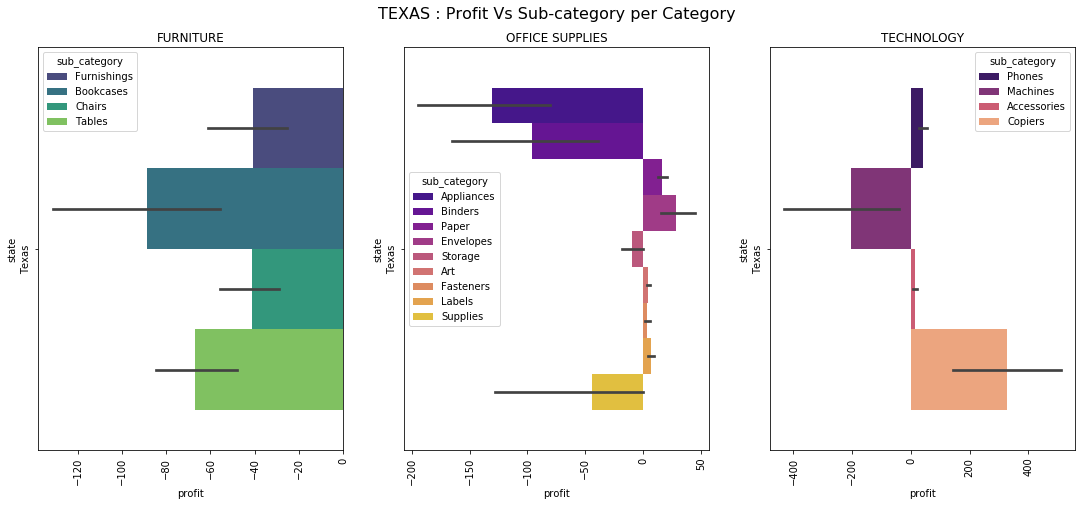

In [63]:
f10, axes = plt.subplots(1,3,figsize=(18,7))
f10.suptitle("TEXAS : Profit Vs Sub-category per Category", fontsize=16)
tex_f = sns.barplot(data=t_cat1, x= "profit", y="state",hue="sub_category", ax = axes[0],palette="viridis")
tex_o = sns.barplot(data=t_cat2, x= "profit", y="state",hue="sub_category", ax = axes[1], palette = "plasma")        
tex_t = sns.barplot(data=t_cat3, x= "profit", y="state",hue="sub_category", ax = axes[2], palette="magma")        
axes[0].set_title("FURNITURE")
axes[1].set_title("OFFICE SUPPLIES")
axes[2].set_title("TECHNOLOGY")
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.9)
f10.subplots_adjust(top=0.9)
for ax in f10.axes:
    ax.tick_params(labelrotation=90)

plt.show()

For Furniture : We see that the entire Furniture Category is in losses with bookcases contributing to the maximum loss in Texas.    
For Office Supplies : Appliances are responsible for the maximum loss in Texas     
For Technology : Machines is majorly responsible for loss in Texas.

In [64]:
texas_profit = data[data.state=="Texas"].profit.sum()
texas_loss = data[data.state=="Texas"].profit.sum()-loss[loss.state=="Texas"].profit.sum()
print(f'Total profit in Texas : {np.round(texas_profit,decimals=2)}')
print(f'Total profit in Texas excluding items that cause loss: {np.round(texas_loss, decimals=2)}')

Total profit in Texas : -25750.98
Total profit in Texas excluding items that cause loss: 11062.24


### Profit Analysis for North Carolina (Region:South)

In [65]:
#Lets check the profit acros each category for North Carolina
nc = data[data["state"] == 'North Carolina']
nc_cat1 = nc[nc.category == 'Furniture']
nc_cat2 = nc[nc.category == 'Office Supplies']
nc_cat3 = nc[nc.category== 'Technology']

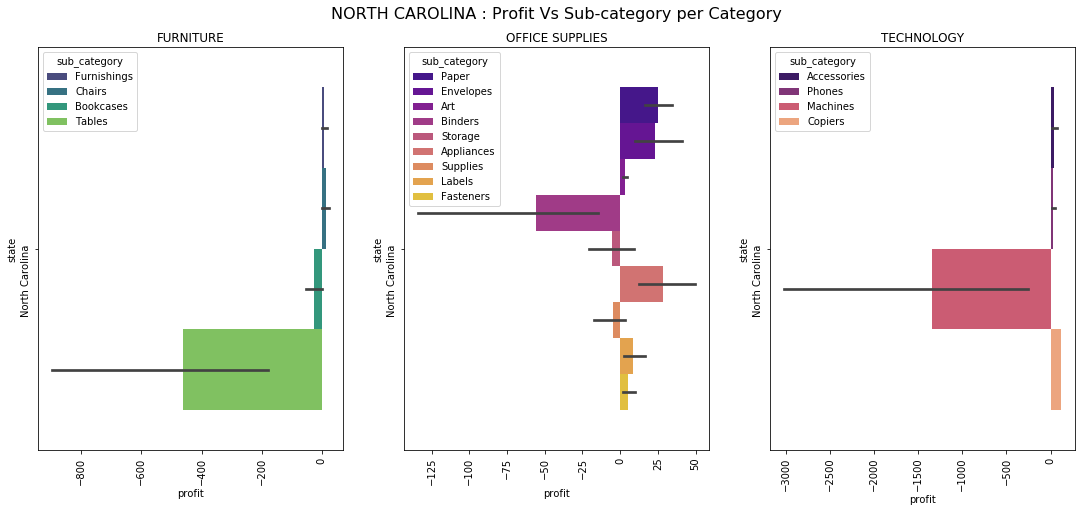

In [66]:
f11, axes = plt.subplots(1,3,figsize=(18,7))
f11.suptitle("NORTH CAROLINA : Profit Vs Sub-category per Category", fontsize=16)
northcal_f = sns.barplot(data=nc_cat1, x= "profit", y="state",hue="sub_category", ax = axes[0],palette="viridis")
northcal_o = sns.barplot(data=nc_cat2, x= "profit", y="state",hue="sub_category", ax = axes[1], palette = "plasma")        
northcal_t = sns.barplot(data=nc_cat3, x= "profit", y="state",hue="sub_category", ax = axes[2], palette="magma")        
axes[0].set_title("FURNITURE")
axes[1].set_title("OFFICE SUPPLIES")
axes[2].set_title("TECHNOLOGY")
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.9)
f11.subplots_adjust(top=0.9)
for ax in f11.axes:
    ax.tick_params(labelrotation=90)

plt.show()

For Furniture : Tables are resposible for huge loss is North Carolina.    
For Office Supplies : Binders are responsible for the maximum loss in North Carolina.    
For Technology : Machines is the only sub-category responsible for huge loss in North Carolina.

In [67]:
northcar_profit = data[data.state=="North Carolina"].profit.sum()
northcar_loss = data[data.state=="North Carolina"].profit.sum()-loss[loss.state=="North Carolina"].profit.sum()
print(f'Total profit in North Carolina : {np.round(northcar_profit,decimals=2)}')
print(f'Total profit in North Carolina excluding items that cause loss : {np.round(northcar_loss, decimals=2)}')

Total profit in North Carolina : -7490.91
Total profit in North Carolina excluding items that cause loss : 4067.09


### Profit Analysis for Colorado (Region:West)

In [68]:
#Lets check the profit acros each category for Colorado
c = data[data["state"] == 'Colorado']
c_cat1 = c[c.category == 'Furniture']
c_cat2 = c[c.category == 'Office Supplies']
c_cat3 = c[c.category== 'Technology']

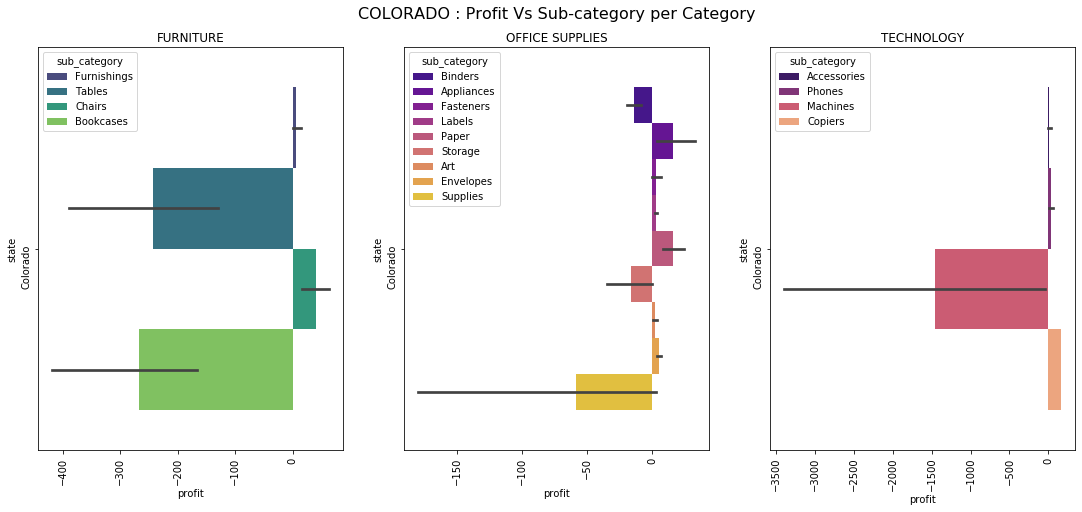

In [69]:
f12, axes = plt.subplots(1,3,figsize=(18,7))
f12.suptitle("COLORADO : Profit Vs Sub-category per Category", fontsize=16)
col_f = sns.barplot(data=c_cat1, x= "profit", y="state",hue="sub_category", ax = axes[0],palette="viridis")
col_o = sns.barplot(data=c_cat2, x= "profit", y="state",hue="sub_category", ax = axes[1], palette = "plasma")        
col_t = sns.barplot(data=c_cat3, x= "profit", y="state",hue="sub_category", ax = axes[2], palette="magma")        
axes[0].set_title("FURNITURE")
axes[1].set_title("OFFICE SUPPLIES")
axes[2].set_title("TECHNOLOGY")
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.9)
f12.subplots_adjust(top=0.9)
for ax in f12.axes:
    ax.tick_params(labelrotation=90)

plt.show()

For Furniture : Bookcases followed by Tables are resposible for loss is Colorado.      
For Office Supplies : Supplies are responsible for the maximum loss in Colorado.    
For Technology : Machines is the only sub-category under technology responsible for huge loss in Colorado.

In [70]:
colorado_profit = data[data.state=="Colorado"].profit.sum()
colorado_loss = data[data.state=="Colorado"].profit.sum()-loss[loss.state=="Colorado"].profit.sum()
print(f'Total profit in Colorado : {np.round(colorado_profit,decimals=2)}')
print(f'Total profit in Colorado excluding items that cause loss : {np.round(colorado_loss, decimals=2)}')

Total profit in Colorado : -6527.86
Total profit in Colorado excluding items that cause loss : 2373.07


### Profit Analysis for Ohio (Region:East)

In [71]:
#Lets check the profit acros each category for Ohio
o = data[data["state"] == 'Ohio']
o_cat1 = o[o.category == 'Furniture']
o_cat2 = o[o.category == 'Office Supplies']
o_cat3 = o[o.category== 'Technology']

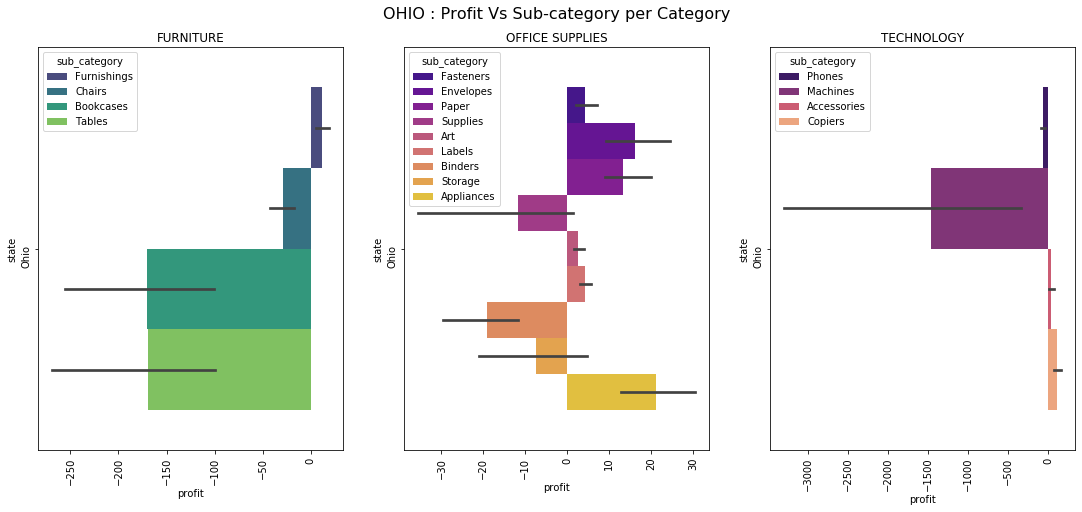

In [72]:
f13, axes = plt.subplots(1,3,figsize=(18,7))
f13.suptitle("OHIO : Profit Vs Sub-category per Category", fontsize=16)
ohio_f = sns.barplot(data=o_cat1, x= "profit", y="state",hue="sub_category", ax = axes[0],palette="viridis")
ohio_o = sns.barplot(data=o_cat2, x= "profit", y="state",hue="sub_category", ax = axes[1], palette = "plasma")        
ohio_t = sns.barplot(data=o_cat3, x= "profit", y="state",hue="sub_category", ax = axes[2], palette="magma")        
axes[0].set_title("FURNITURE")
axes[1].set_title("OFFICE SUPPLIES")
axes[2].set_title("TECHNOLOGY")
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.9)
f13.subplots_adjust(top=0.9)
for ax in f13.axes:
    ax.tick_params(labelrotation=90)

plt.show()

For Furniture : Bookcases and Tables are resposible for loss is Ohio.   
For Office Supplies : Binders are responsible for the maximum loss in Ohio.     
For Technology : Machines is responsible for huge loss in North Ohio.

In [73]:
ohio_profit = data[data.state=="Ohio"].profit.sum()
ohio_loss = data[data.state=="Ohio"].profit.sum()-loss[loss.state=="Ohio"].profit.sum()
print(f'Total profit in Ohio : {np.round(ohio_profit,decimals=2)}')
print(f'Total profit in Ohio excluding items that cause loss: {np.round(ohio_loss, decimals=2)}')

Total profit in Ohio : -16959.32
Total profit in Ohio excluding items that cause loss: 4778.64


## Findings:
#### The Superstore gained a profit of 80.72% and faced a loss of 18.68 % and a no- profit of 0.67%.
#### The profit is in a good range when the discount is minimal. Profit is maximum when there is no discount.
#### We see a trend that profit is higher when the quantity sold is odd an number.
#### Standard class of ship mode is the highest contributor for both profit and loss.
#### Same day ship mode is the lowest contributor for both profit and loss.
#### Consumer segment is the biggest contributor for both profit and loss.
#### Home office segment is the smallest contributor for both profit and loss.
#### West region gained the maximum profit with California being its highest contributer.

#### Central region is facing the maximum loss in sales compared with others with Texas being the prime contributer for the loss.

#### Technology gained the maximum profit with Copiers being its highest contributer.

#### Overall the Furniture Category is responsible for the highest amount of loss with Tables being the major contributer for loss followed by Bookcases , and then Supplies from the  Office Supplies Category.

#### States facing the maximum profit per region are as follows:
Central : Michigan  
South : Virginia   
West : California   
East : New York

#### States facing the maximum loss per region are as follows:
Central : Texas  
South : North Carolina   
West : Colorado   
East : Ohio
#### In each of these four states, Machines from the technology category is the biggest contributer for loss, but in overall category analysis we find furniture category is responsible for a considerable amount of loss especially due to the sale of tables and bookcases.


## Conclusion:
#### The product must sell with low/no discount to become the most profitable.

#### Sale of Furniture must be minimised especially for Tables and Bookcases to minimise loss. 

#### From the technology category the sale of Machines should be minimised and the sale of Copiers should be increased to maximise profit especially in the states  facing loss.

#### From the Office Supplies category the sale of Supplies should be minimised and the sale of paper should be increased to maximise profit.